In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import handle_missing_values, missing_nulls, remove_outliers, tts
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression

### Get the data from local files

In [2]:
#loading the data
white=pd.read_csv('winequality-white.csv')
red=pd.read_csv('winequality-red.csv')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red.shape, white.shape

((1599, 12), (4898, 12))

In [6]:
#assigning the color column to each dataframe
red['color']= 'red'
white['color']= 'white'

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
#concatinating the two dataframes into one
wine= pd.concat([red, white], ignore_index=True)

In [10]:
wine.shape

(6497, 13)

### Visualizing feature relationships for red and white

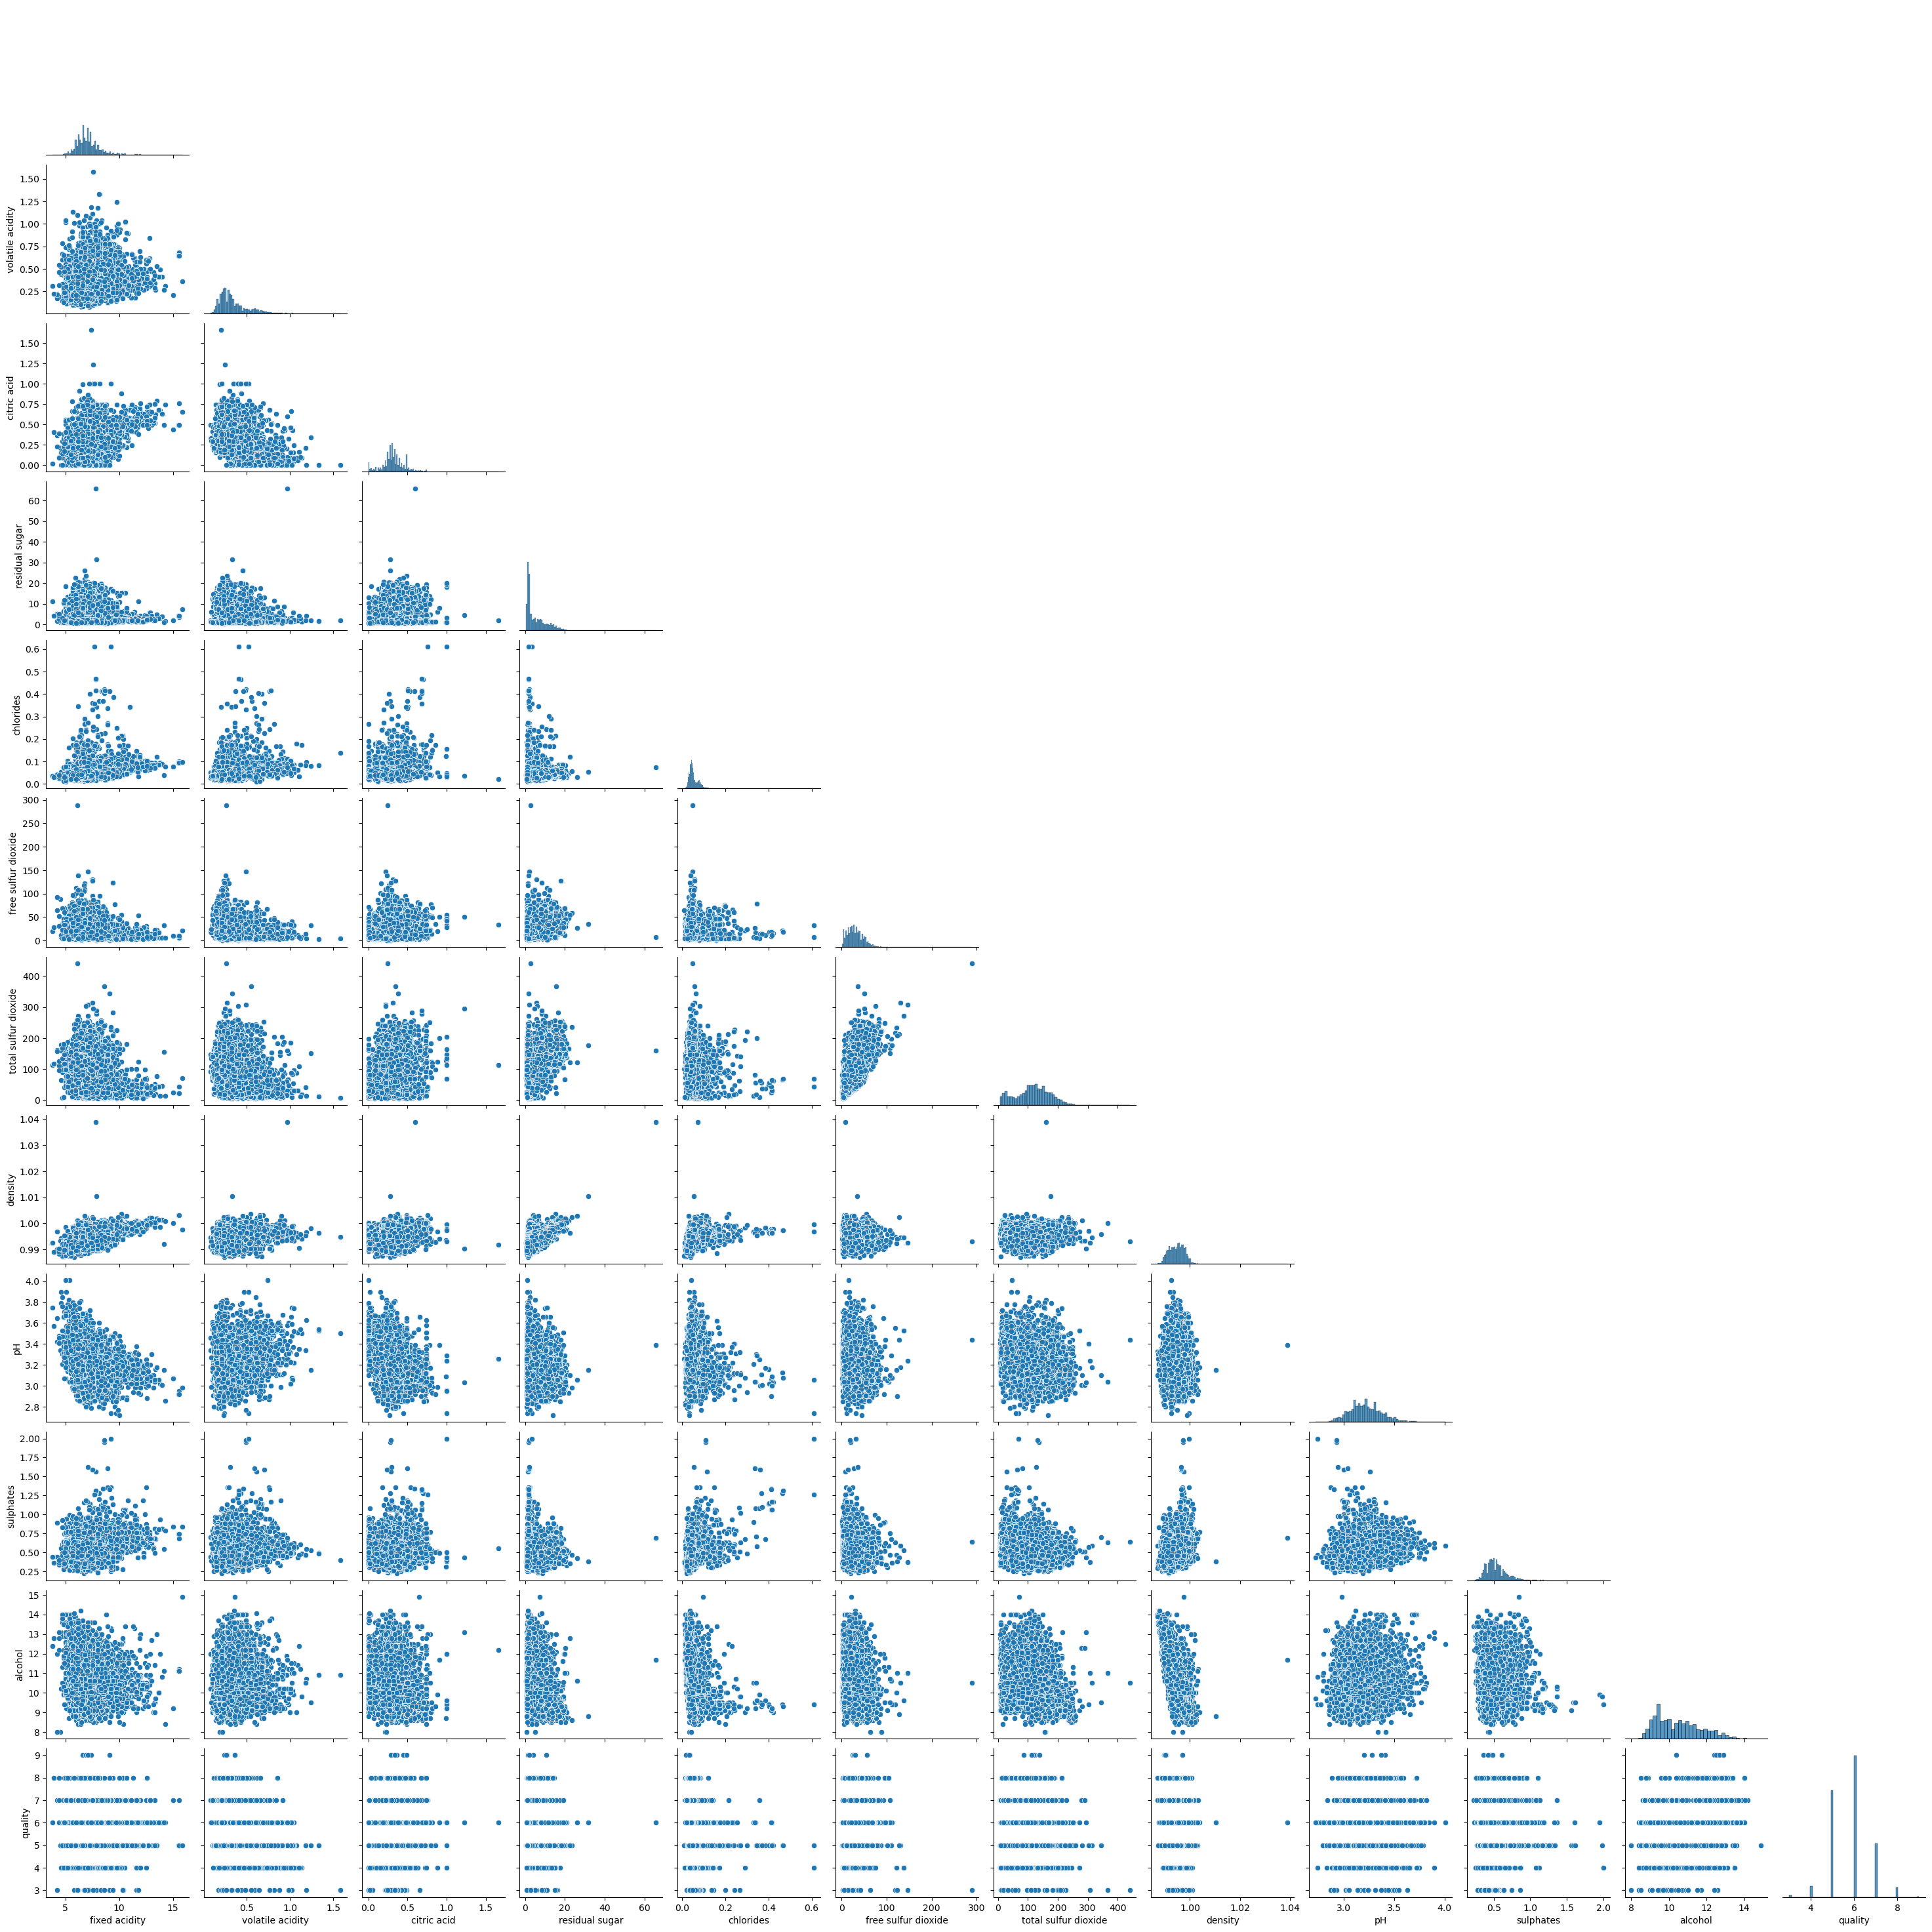

In [11]:
sns.pairplot(data=wine, corner=True)

In [12]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


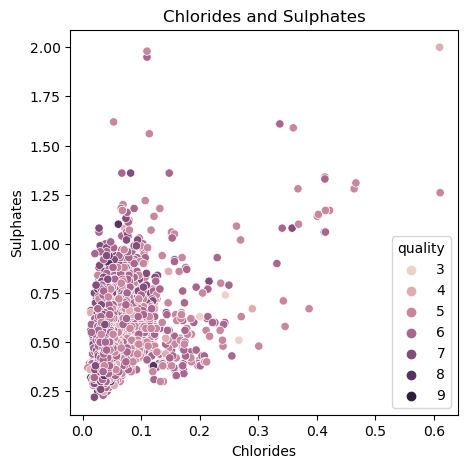

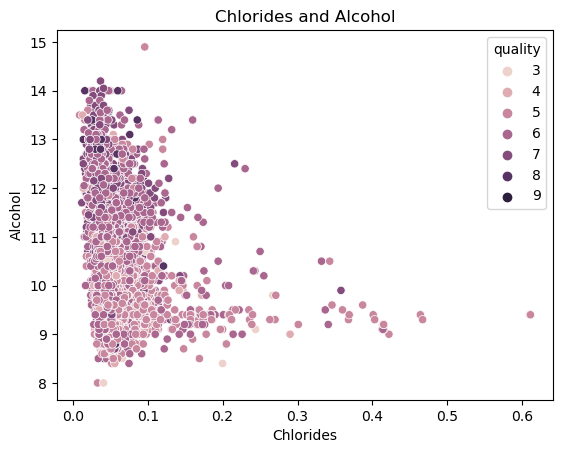

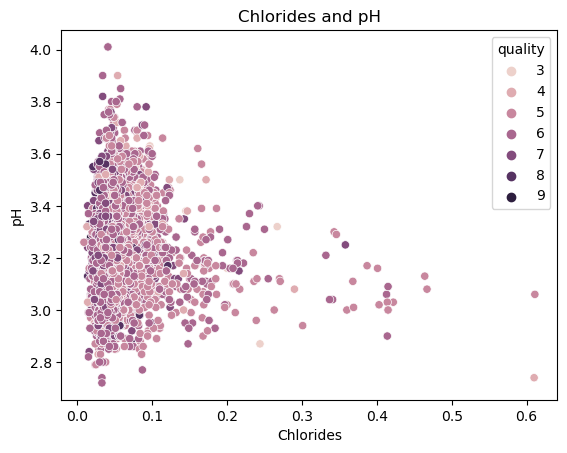

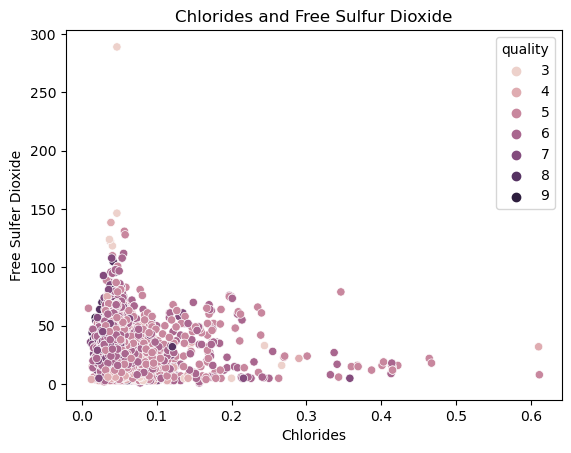

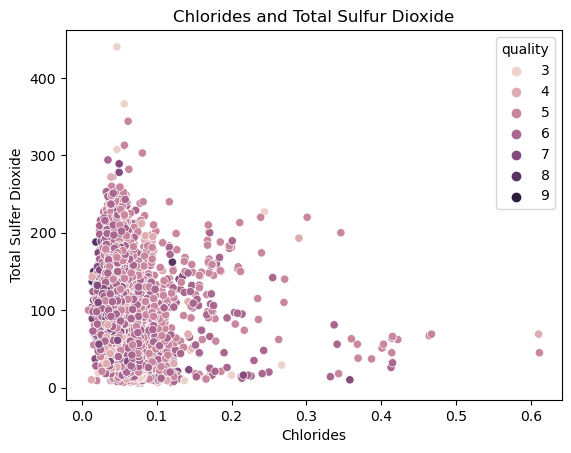

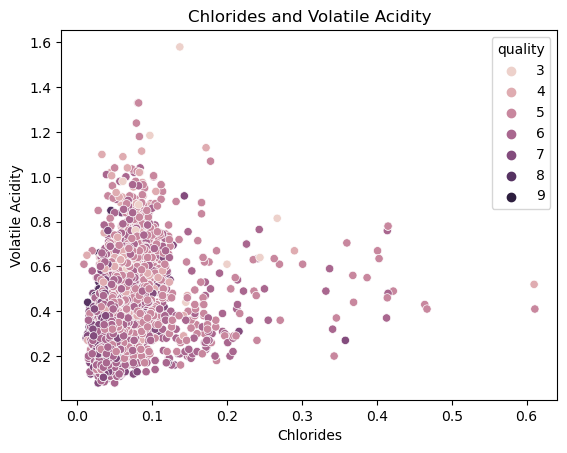

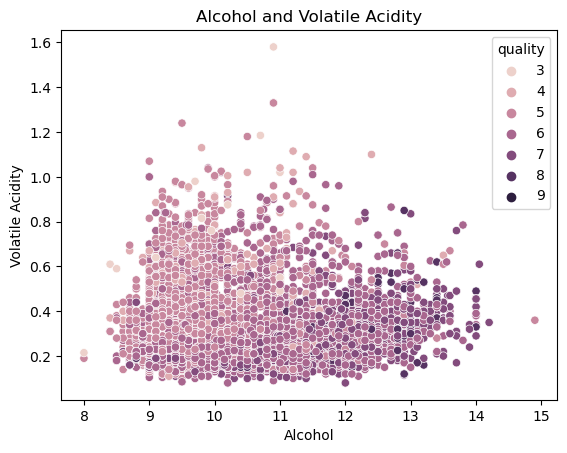

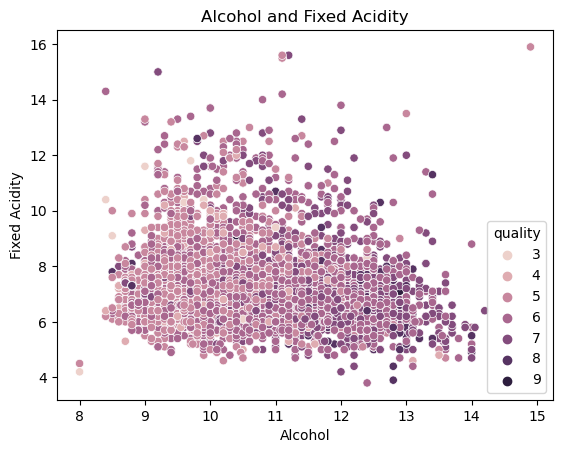

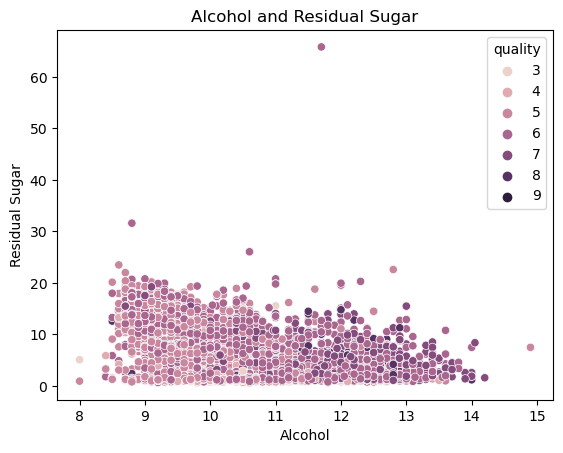

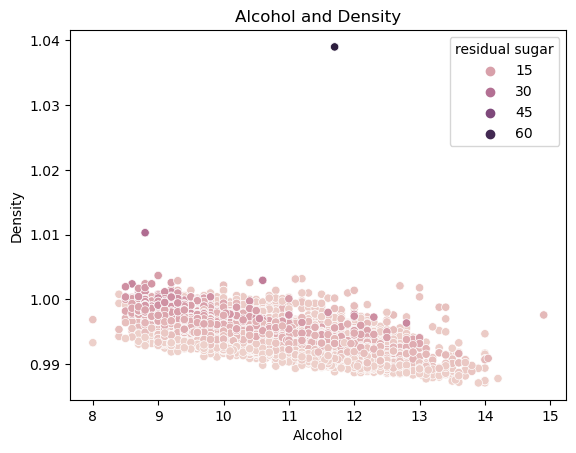

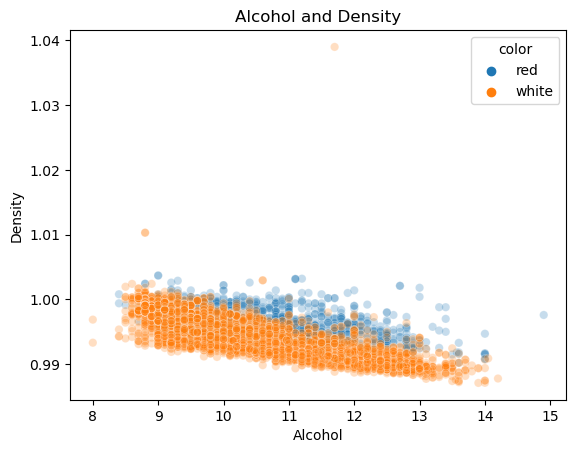

In [24]:
plt.figure(figsize=(5,5))

sns.scatterplot(x='chlorides', y='sulphates', data=wine, hue= 'quality')
plt.title('Chlorides and Sulphates')
plt.xlabel('Chlorides')
plt.ylabel('Sulphates')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='alcohol', data=wine, hue= 'quality')
plt.title('Chlorides and Alcohol')
plt.xlabel('Chlorides')
plt.ylabel('Alcohol')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='pH', data=wine, hue= 'quality')
plt.title('Chlorides and pH')
plt.xlabel('Chlorides')
plt.ylabel('pH')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='free sulfur dioxide', data=wine, hue= 'quality')
plt.title('Chlorides and Free Sulfur Dioxide')
plt.xlabel('Chlorides')
plt.ylabel('Free Sulfer Dioxide')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='total sulfur dioxide', data=wine, hue= 'quality')
plt.title('Chlorides and Total Sulfur Dioxide')
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfer Dioxide')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='volatile acidity', data=wine, hue= 'quality')
plt.title('Chlorides and Volatile Acidity')
plt.xlabel('Chlorides')
plt.ylabel('Volatile Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='volatile acidity', data=wine, hue= 'quality')
plt.title('Alcohol and Volatile Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='fixed acidity', data=wine, hue= 'quality')
plt.title('Alcohol and Fixed Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='residual sugar', data=wine, hue= 'quality')
plt.title('Alcohol and Residual Sugar')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='density', data=wine, hue= 'residual sugar')
plt.title('Alcohol and Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='density', data=wine, hue= 'color', alpha=.25)
plt.title('Alcohol and Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()
plt.clf()
plt.close()

In [20]:
wine['residual sugar'].mean()

5.4432353393874156